In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\james\Downloads\McDonalds Nutrition\menu.csv")
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [4]:
calories = df['Calories']

Text(0.5, -0.02, 'Calories')

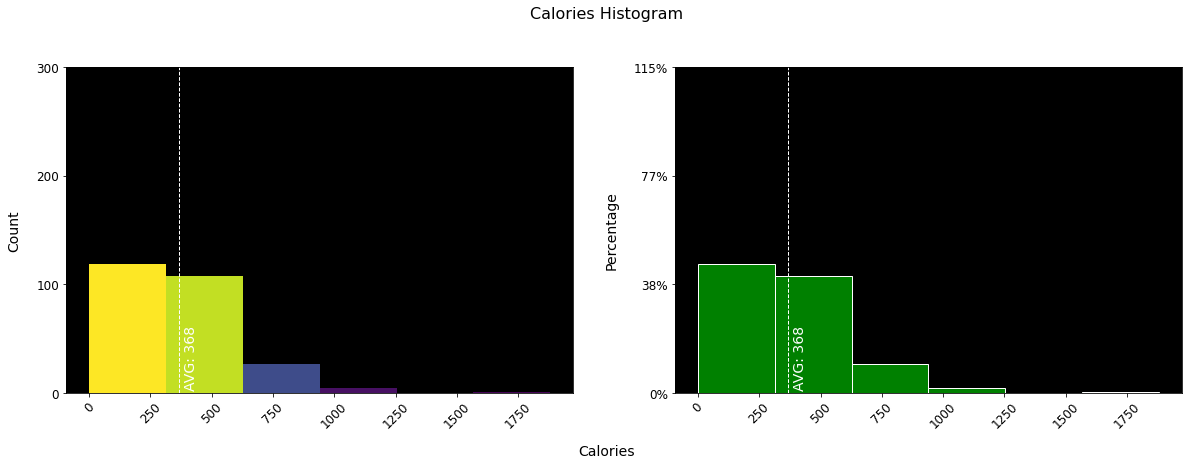

In [5]:
n_bins = 6
fig, axs = plt.subplots(1, 2, sharey=False, sharex=True, figsize=(20, 6))
fig.suptitle('Calories Histogram', y=1.02, fontsize = 16)

calories_mean = round(calories.mean())
axs[0].axvline(calories_mean, color='w', linestyle='dashed', linewidth=1)
axs[1].axvline(calories_mean, color='w', linestyle='dashed', linewidth=1)

N, bins, patches = axs[0].hist(calories, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
axs[1].hist(calories, bins=n_bins, color='green', edgecolor='w')
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=len(calories)))

axs[0].set_ylabel('Count', fontsize=14, labelpad=15)
axs[1].set_ylabel('Percentage', fontsize=14, labelpad=15)

axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)

axs[0].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='x', labelrotation=45)

major_ticks = np.arange(0, max(axs[0].get_ylim()) + 250, 100)

axs[0].set_yticks(major_ticks)
axs[1].set_yticks(major_ticks)

axs[0].set_facecolor('k')
axs[1].set_facecolor('k')

fig.set_facecolor('w')

axs[0].text(calories_mean + 20, 5, 'AVG: ' f'{calories_mean:,}', 
            size=14, color='w', rotation=90)

axs[1].text(calories_mean + 20, 5, 'AVG: ' f'{calories_mean:,}', 
            size=14, color='w', rotation=90)

plt.gcf().text(0.5,-0.02, "Calories", ha="center", fontsize=14)

In [6]:
df2= pd.read_csv(r"C:\Users\james\Downloads\McDonalds Nutrition\menu.csv")
df2.drop(['Serving Size'], axis=1, inplace=True)
df2[df2.columns[2:]] = df2[df2.columns[2:]].astype(int)
df2.head()

,Category,Item,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,300,120,13,20,5,25,0,260,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,250,70,8,12,3,15,0,25,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,370,200,23,35,8,42,0,45,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,450,250,28,43,10,52,0,285,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,400,210,23,35,8,42,0,50,...,30,10,4,17,2,21,6,0,25,10


In [7]:
val_vars=['Category', 'Item']
other_vars = df2.columns.difference(val_vars)
df2 = pd.melt(df2, id_vars=val_vars, value_vars=other_vars)
df2 = df2.sort_values('value', ascending = False).reset_index(drop=True)
df2.head()

,Category,Item,variable,value
0,Chicken & Fish,Chicken McNuggets (40 piece),Sodium,3600
1,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,Sodium,2290
2,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),Sodium,2260
3,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,Sodium,2170
4,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),Sodium,2150


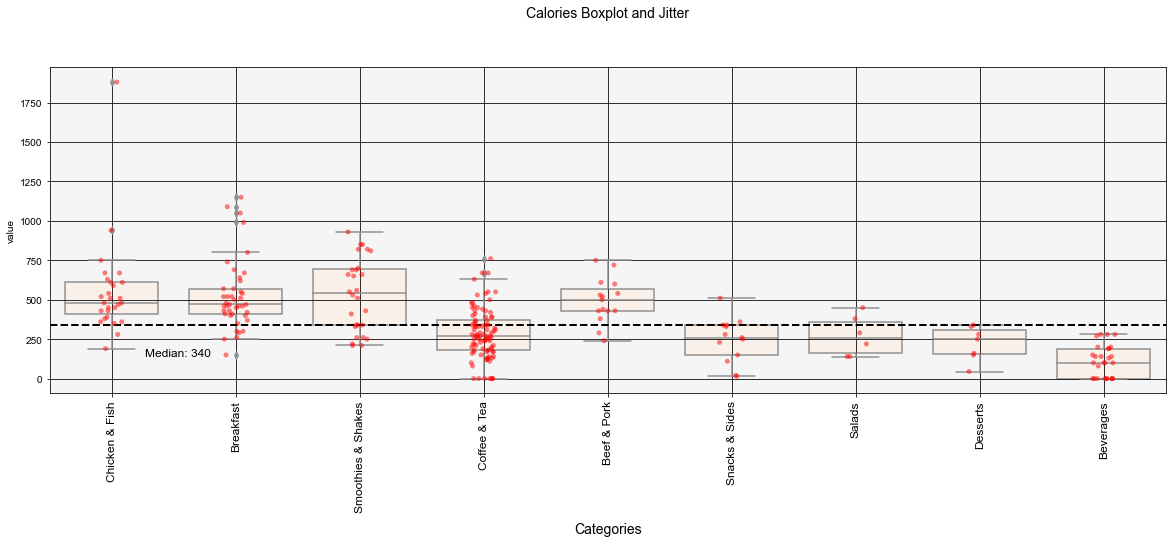

In [8]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_style("whitegrid")
bplot = sns.boxplot(y='value', x='Category', data=df2[df2['variable'] == 'Calories'], width=0.75, color='linen')
splot = sns.stripplot(y='value', x ='Category', data=df2[df2['variable'] == 'Calories'], jitter=True, marker='o', alpha=0.5, color='r')
plt.xticks(rotation='vertical', fontsize=12)

ax.set_xlabel('Categories', fontsize=14, labelpad=10)
plt.title('Calories Boxplot and Jitter', fontsize=14, pad = 50)
mediancalories = int(df2['value'].loc[df2['variable']=='Calories'].median())
ax.axhline(mediancalories, color='k', linestyle='dashed', linewidth=2)
ax.text(0.27, mediancalories -200, 'Median: ' f'{mediancalories:,}', size=12, color='k')
ax.set_facecolor('whitesmoke')
ax.grid(color='k')
fig.set_facecolor('w')


In [9]:
categories = df2['Category'].unique()
variables = df2['variable'].unique()
variables_percentage = []
variables_total = []

for j, variable in enumerate(variables):
    if variable.find('%') > -1:
        variables_percentage.append(variable)

for j, variable in enumerate(variables):
    if variable.find('%') == -1:
        variables_total.append(variable)

df2 = df2.sort_values('value', ascending = False)

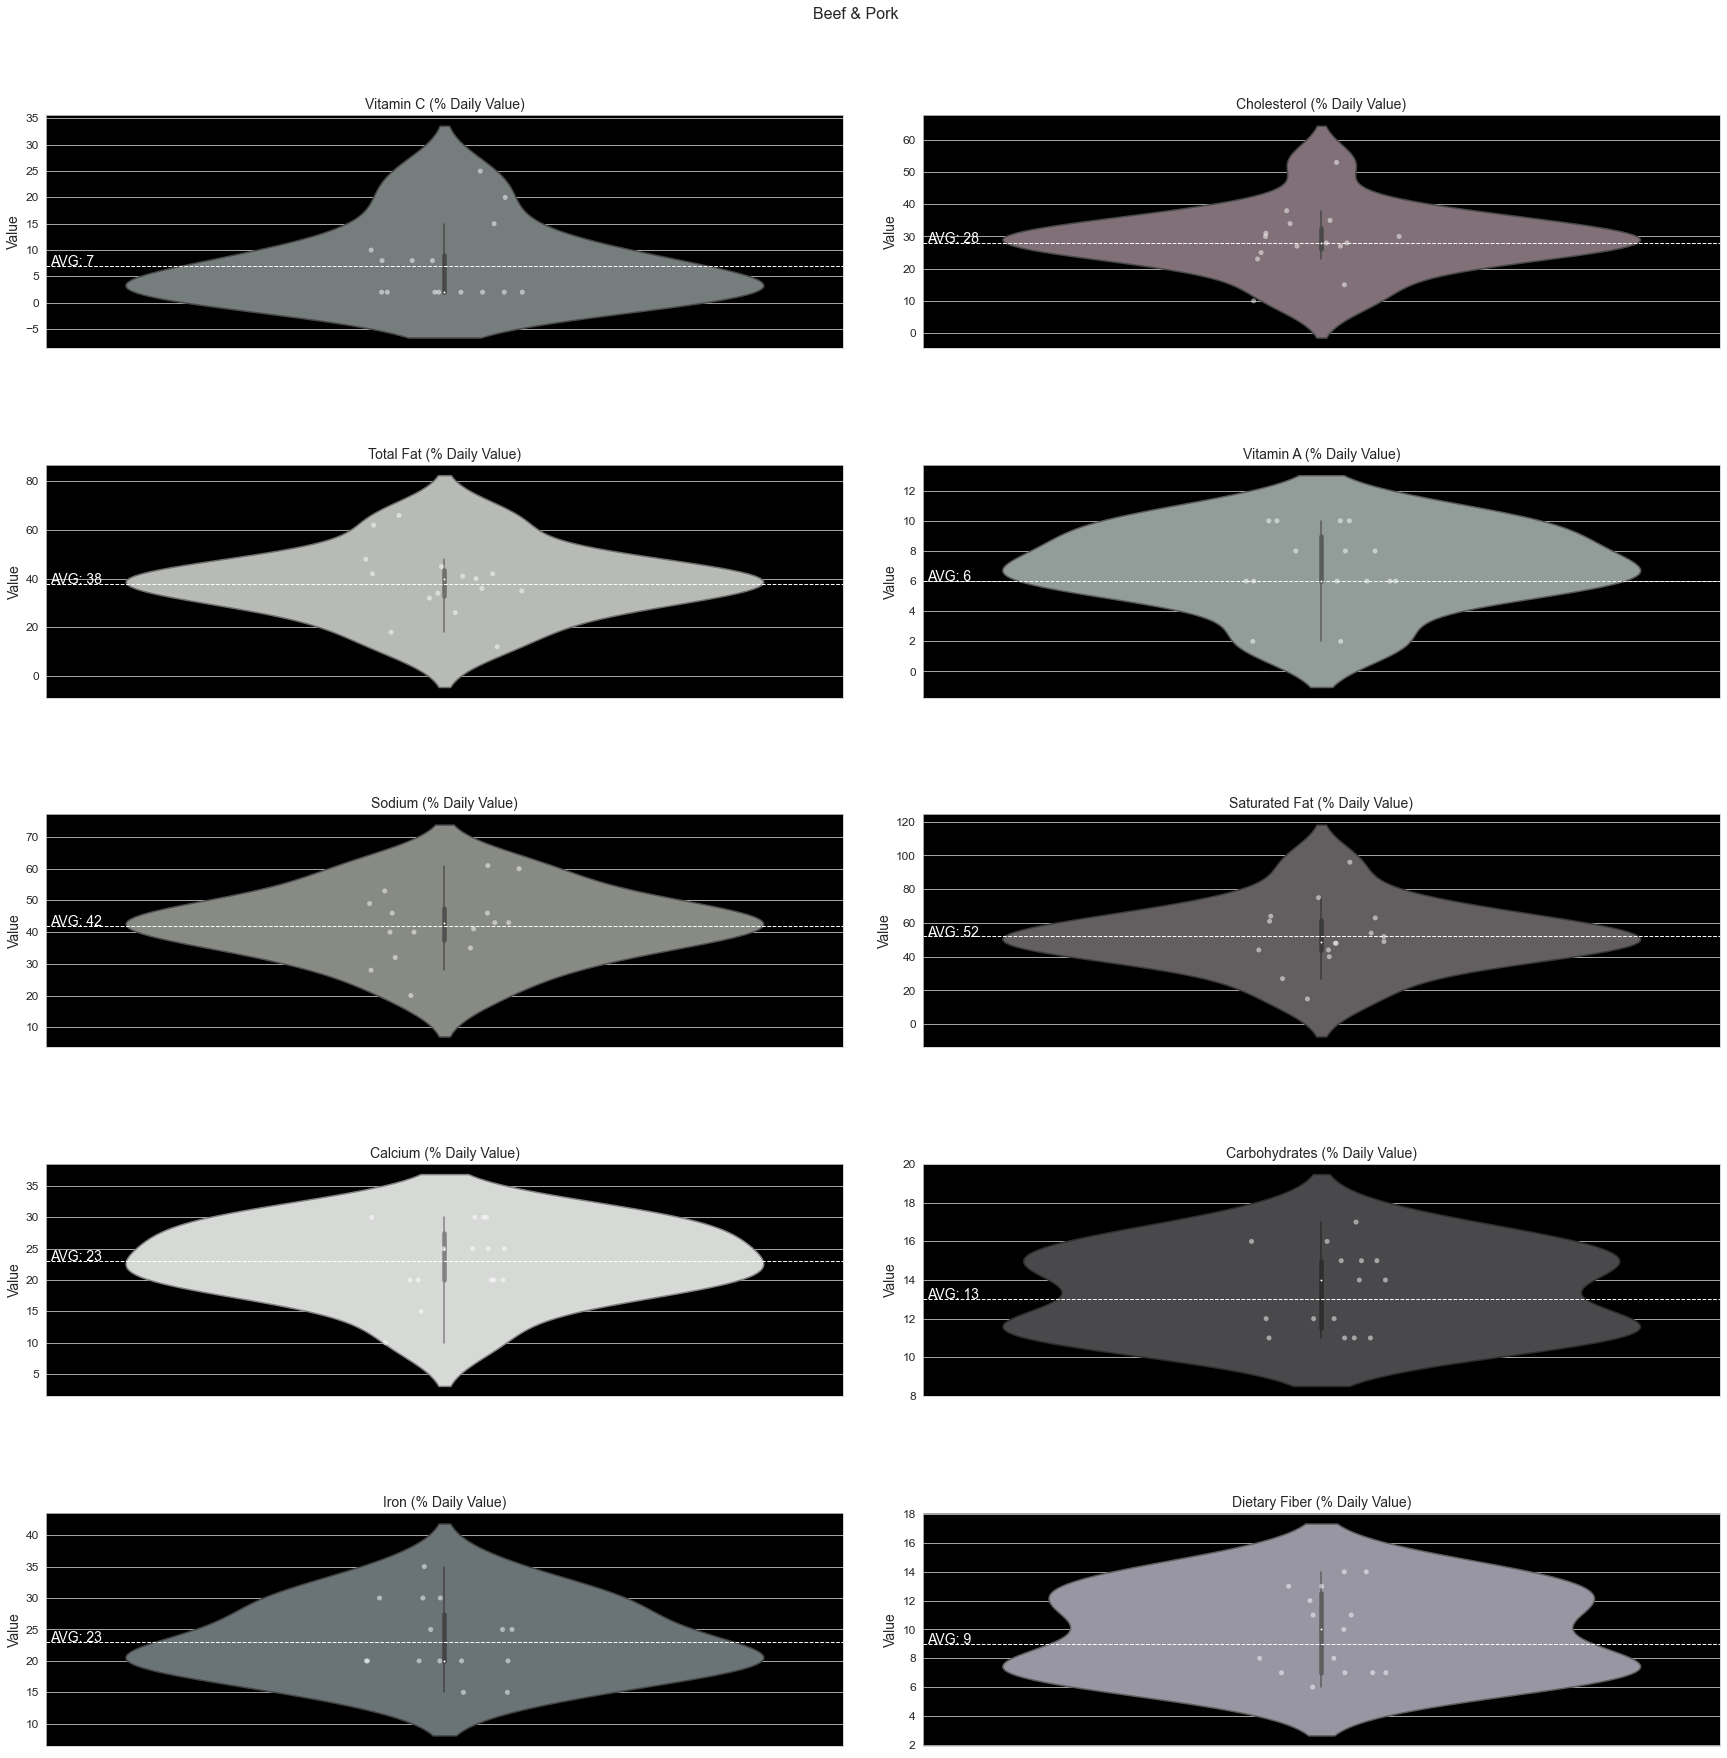

In [10]:
fig, axs = plt.subplots(5, 2, figsize=(30, 30))
i = 0
axs = axs.flatten()
for j, variable in enumerate(variables_percentage):
    color_set = False
    while color_set == False:
        color=np.random.rand(3,)
        k = 0
        for i, c in enumerate(color):
            if c < 0.3:
                k = i + 1
        if k <= 1:
            color_set = True
    value = df2['value'].loc[(df2['Category'] == categories[i]) & (df2['variable'] == variable)]
    sns.violinplot(value, ax=axs[j], orient="v", color=np.random.rand(3,), saturation=0.075)
    sns.stripplot(value, marker='o', alpha=0.5, color='w', orient="v", ax=axs[j])
    axs[j].set_title(variable, fontsize=14)
    mean = int(value.mean())
    axs[j].axhline(mean, color='w', linestyle='dashed', linewidth=1)
    axs[j].text(-0.495, mean, 'AVG: ' f'{mean:,}', 
            size=14, color='w')
    axs[j].tick_params(labelsize=12)
    axs[j].set_ylabel('Value', fontsize=14)
    axs[j].set_facecolor('k')
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)
fig.suptitle(categories[i], y=0.93, fontsize = 16)
fig.set_facecolor('w')

plt.show()                

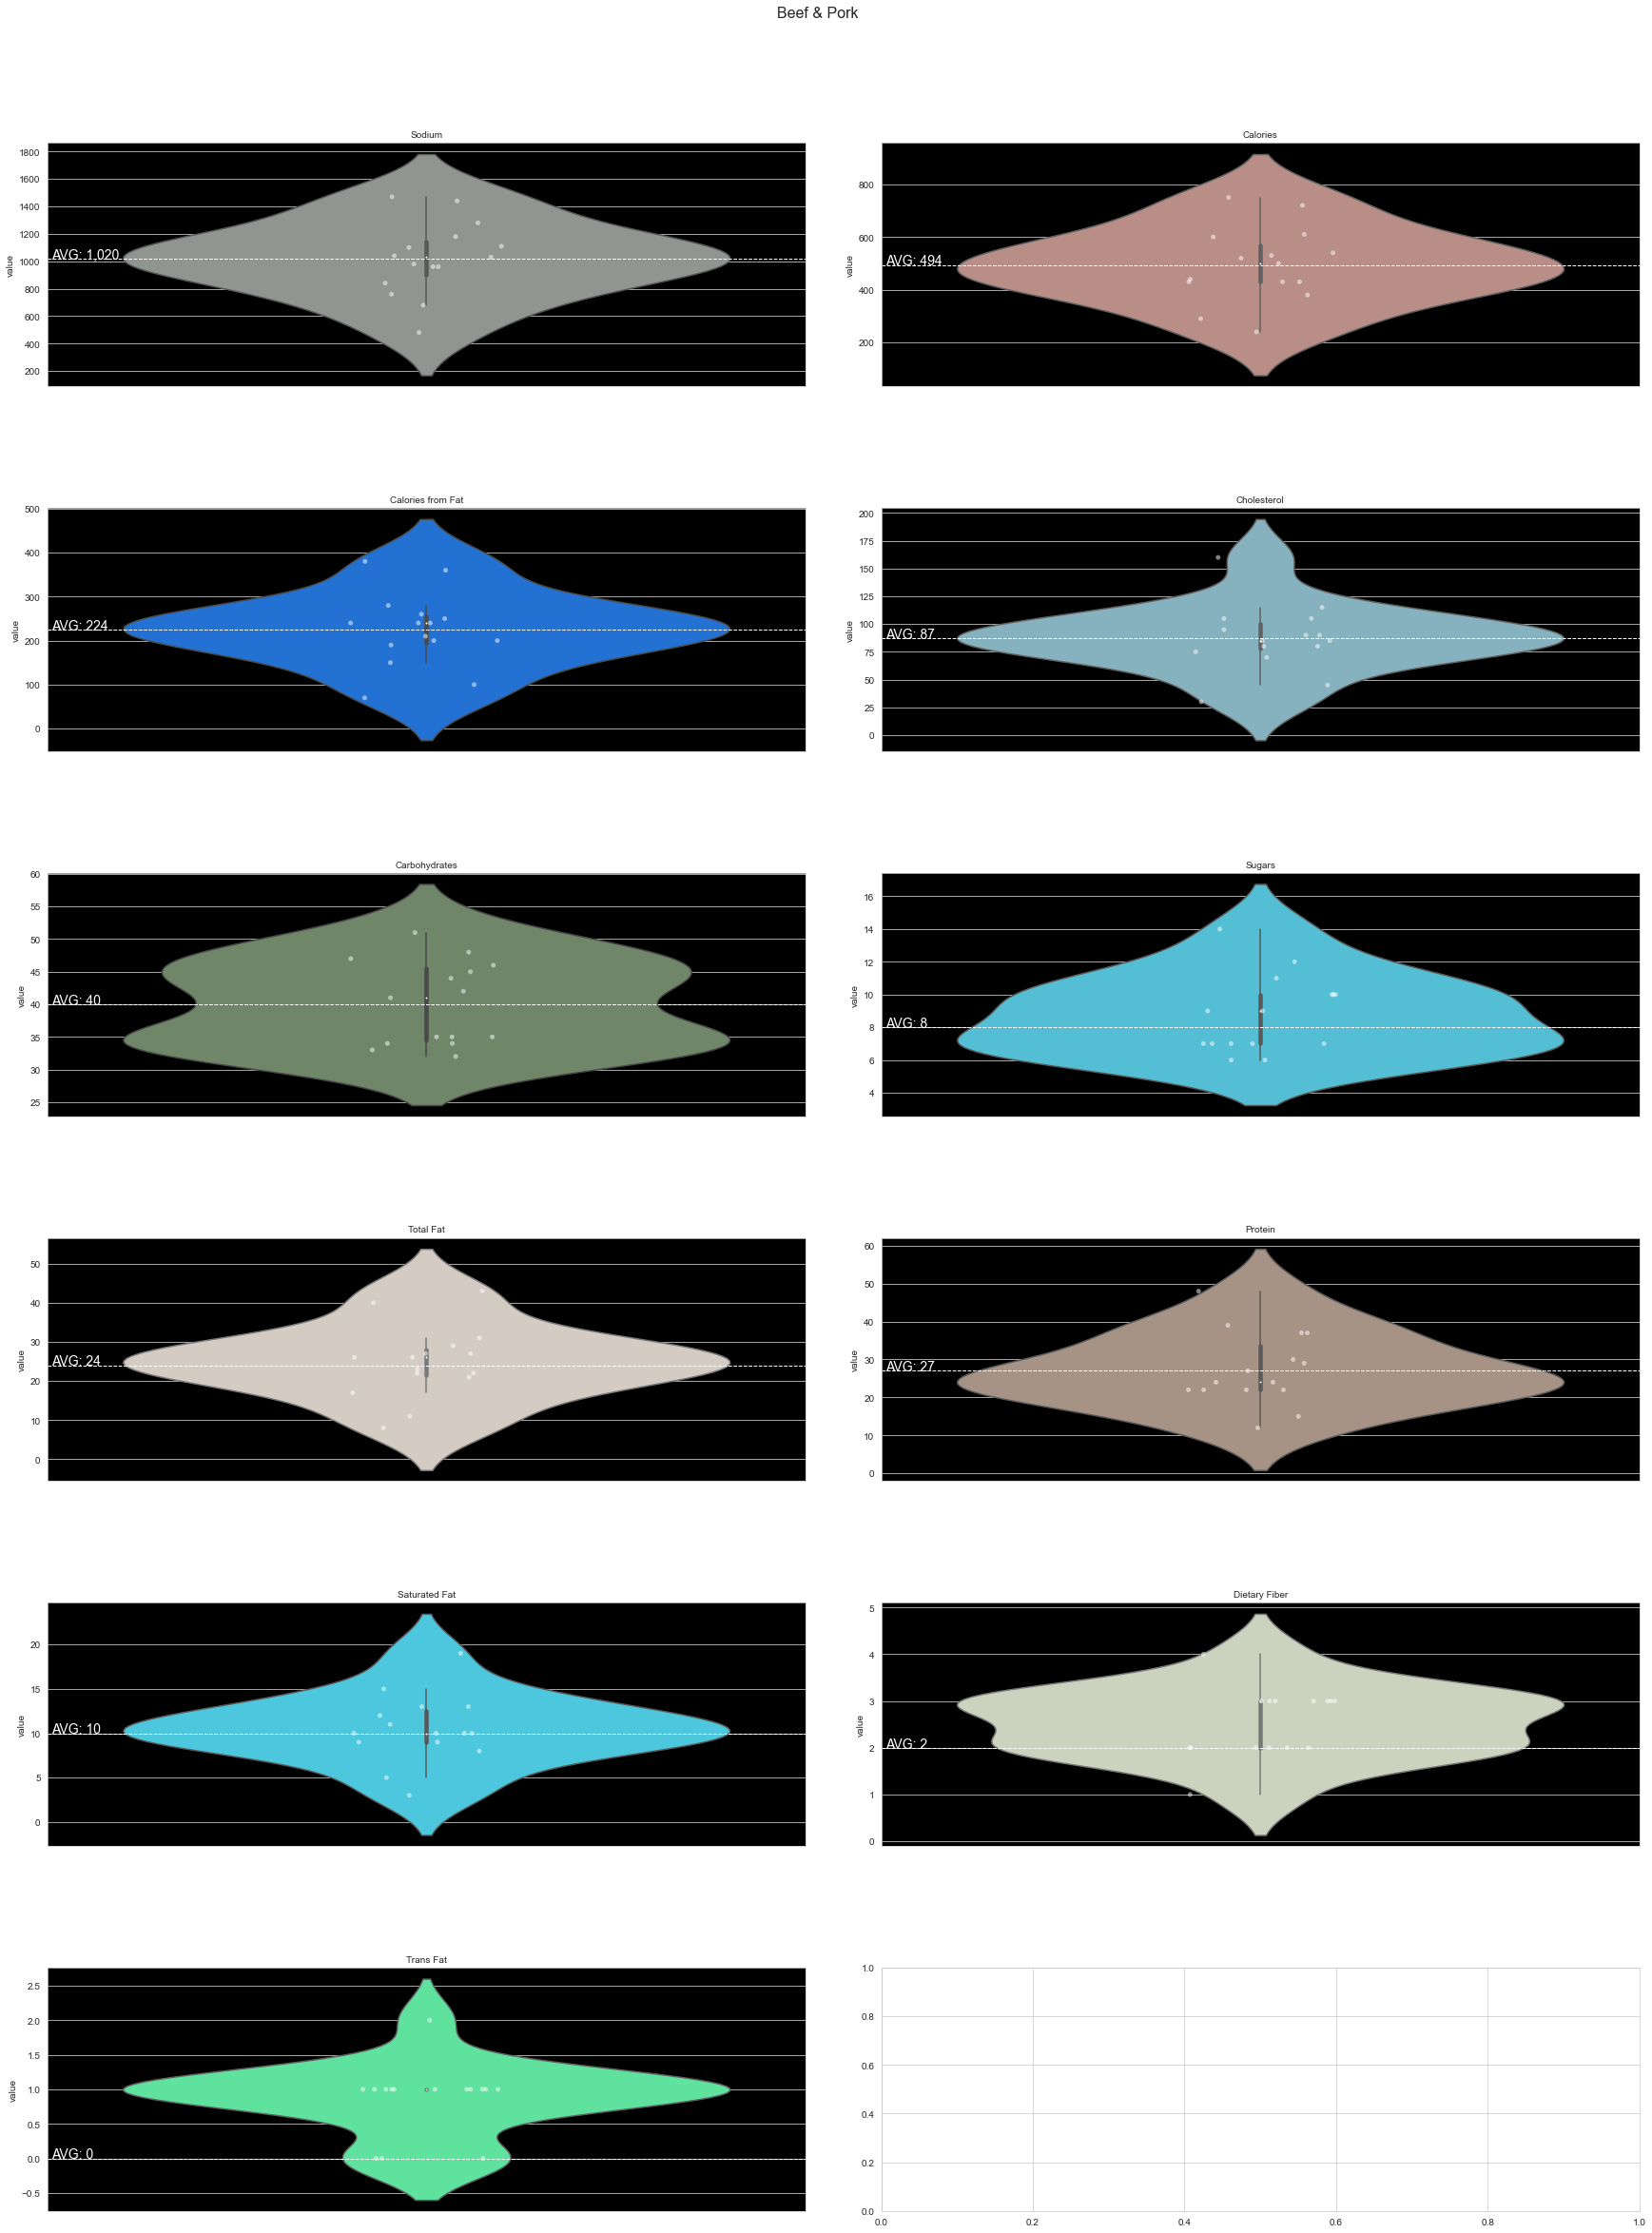

In [11]:
fig, axs = plt.subplots(6, 2, figsize=(30, 40))
        
i = 0
axs = axs.flatten()
for j, variable in enumerate(variables_total):
    color_set = False
    while color_set == False:
        color=np.random.rand(3,)
        k = 0
        for i, c in enumerate(color):
            if c < 0.3:
                k = i + 1
        if k <= 1:
            color_set = True
    value = df2['value'].loc[(df2['Category'] == categories[i]) & (df2['variable'] == variable)]
    sns.violinplot(value, ax=axs[j], orient="v", color=color)
    sns.stripplot(value, marker='o', alpha=0.5, color='w', orient="v", ax=axs[j])
    axs[j].set_title(variable, fontsize=10)
    mean = int(value.mean())
    axs[j].axhline(mean, color='w', linestyle='dashed', linewidth=1)
    axs[j].text(-0.495, mean, 'AVG: ' f'{mean:,}', size=14, color='w')
    axs[j].set_facecolor('k')

    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)
fig.suptitle(categories[i], y=0.93, fontsize = 16)
fig.set_facecolor('w')
plt.show()                

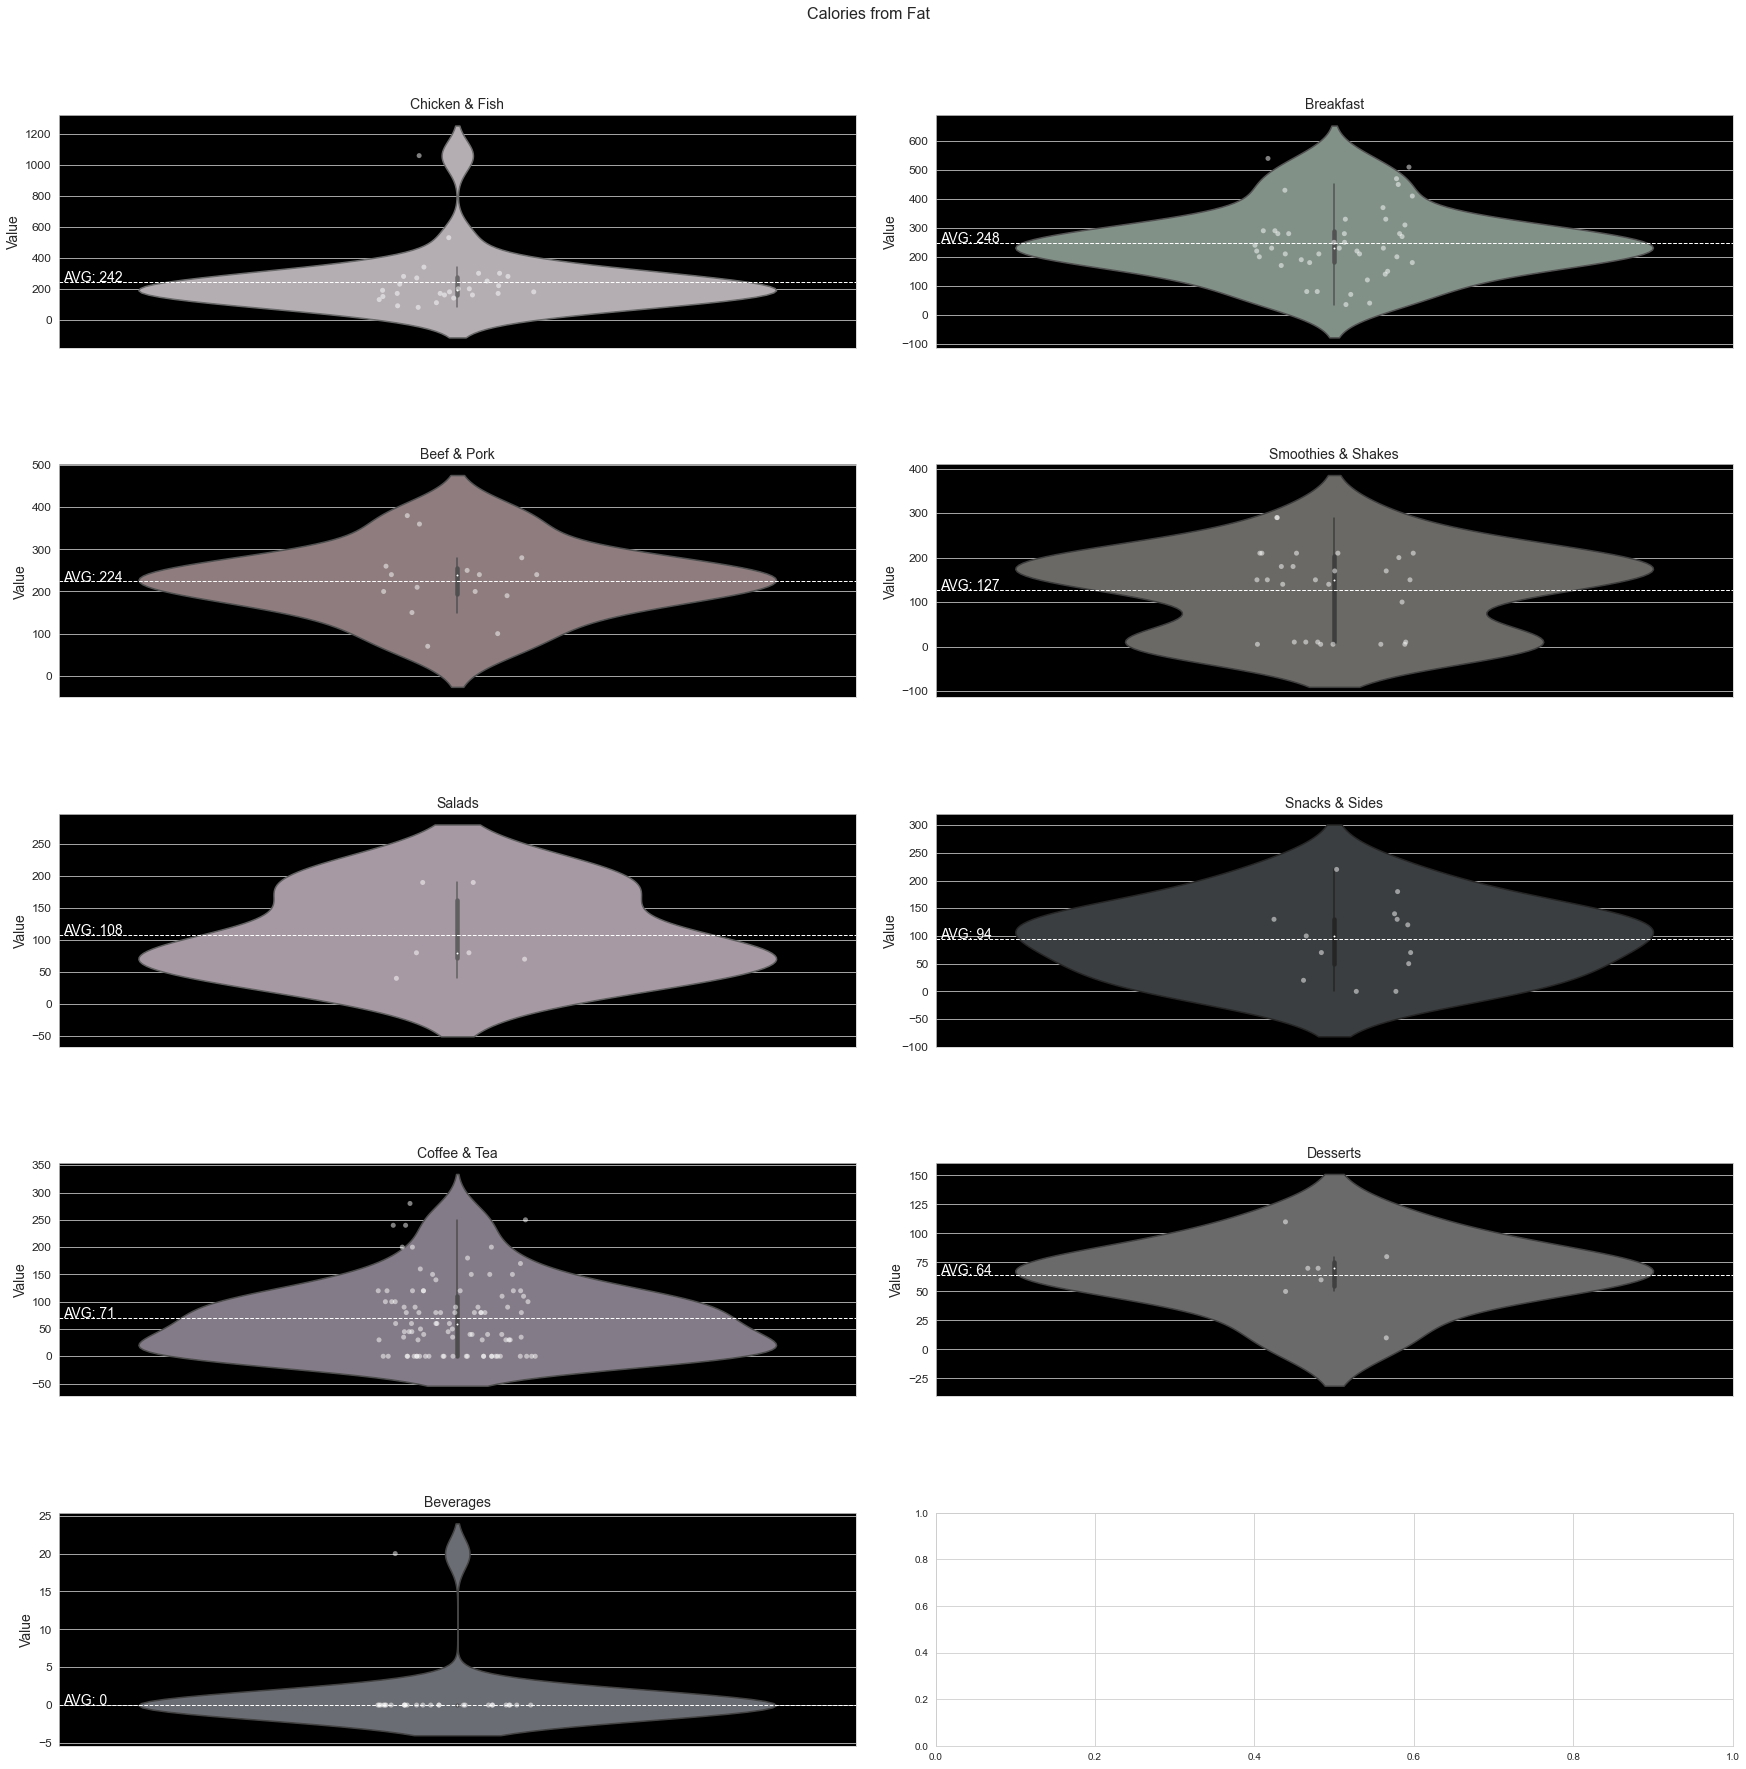

In [12]:
fig, axs = plt.subplots(5, 2, figsize=(30, 30))
i = 0
axs = axs.flatten()
for j, category in enumerate(categories):
    color_set = False
    while color_set == False:
        color=np.random.rand(3,)
        k = 0
        for i, c in enumerate(color):
            if c < 0.3:
                k = i + 1
        if k <= 1:
            color_set = True
    value = df2['value'].loc[(df2['Category'] == category) & (df2['variable'] == variables[i])]
    sns.violinplot(value, ax=axs[j], orient="v", color=np.random.rand(3,), saturation=0.075)
    sns.stripplot(value, marker='o', alpha=0.5, color='w', orient="v", ax=axs[j])
    axs[j].set_title(category, fontsize=14)
    mean = int(value.mean())
    axs[j].axhline(mean, color='w', linestyle='dashed', linewidth=1)
    axs[j].text(-0.495, mean, 'AVG: ' f'{mean:,}', 
            size=14, color='w')
    axs[j].tick_params(labelsize=12)
    axs[j].set_ylabel('Value', fontsize=14)
    axs[j].set_facecolor('k')
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)
fig.suptitle(variables[i], y=0.93, fontsize = 16)
fig.set_facecolor('w')

plt.show()                

In [13]:
df3 = df.drop(['Item', 'Serving Size'], axis=1)
for i, variable in enumerate(variables_percentage):
    if variable in df3:
        df3.drop([variable], inplace=True, axis=1)

c:\users\james\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\james\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\james\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\james\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


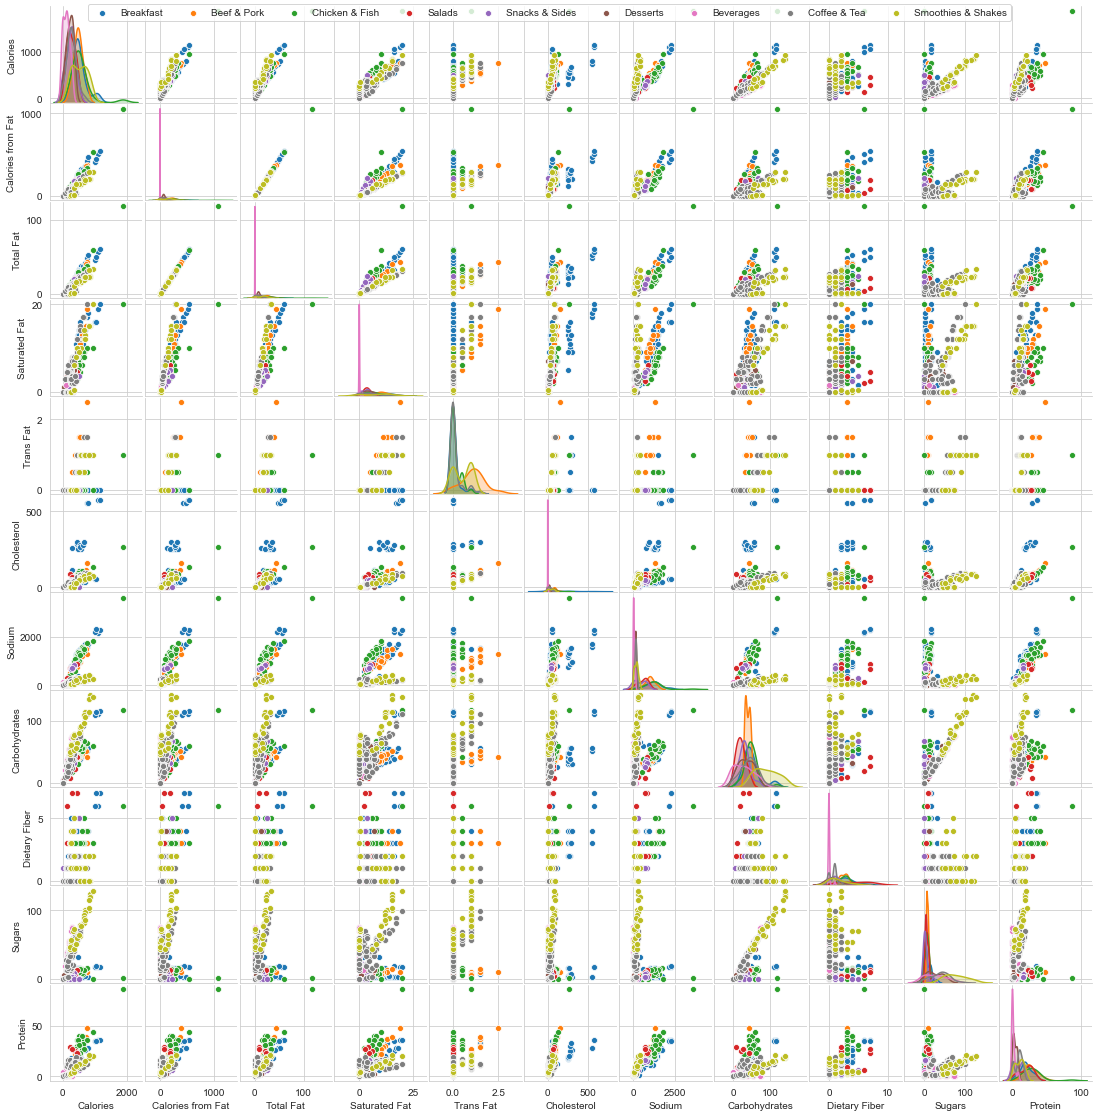

In [14]:
g = sns.pairplot(df3, hue='Category', height=8)
g.fig.set_size_inches(15,15)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=9)
sns.set(font_scale=1.5)





In [15]:
variables_total_2 = variables_total
variables_total_2.remove('Calories')

Text(0.5, 0.89, 'Calories Heatmap VS Other Nutritional Categories')

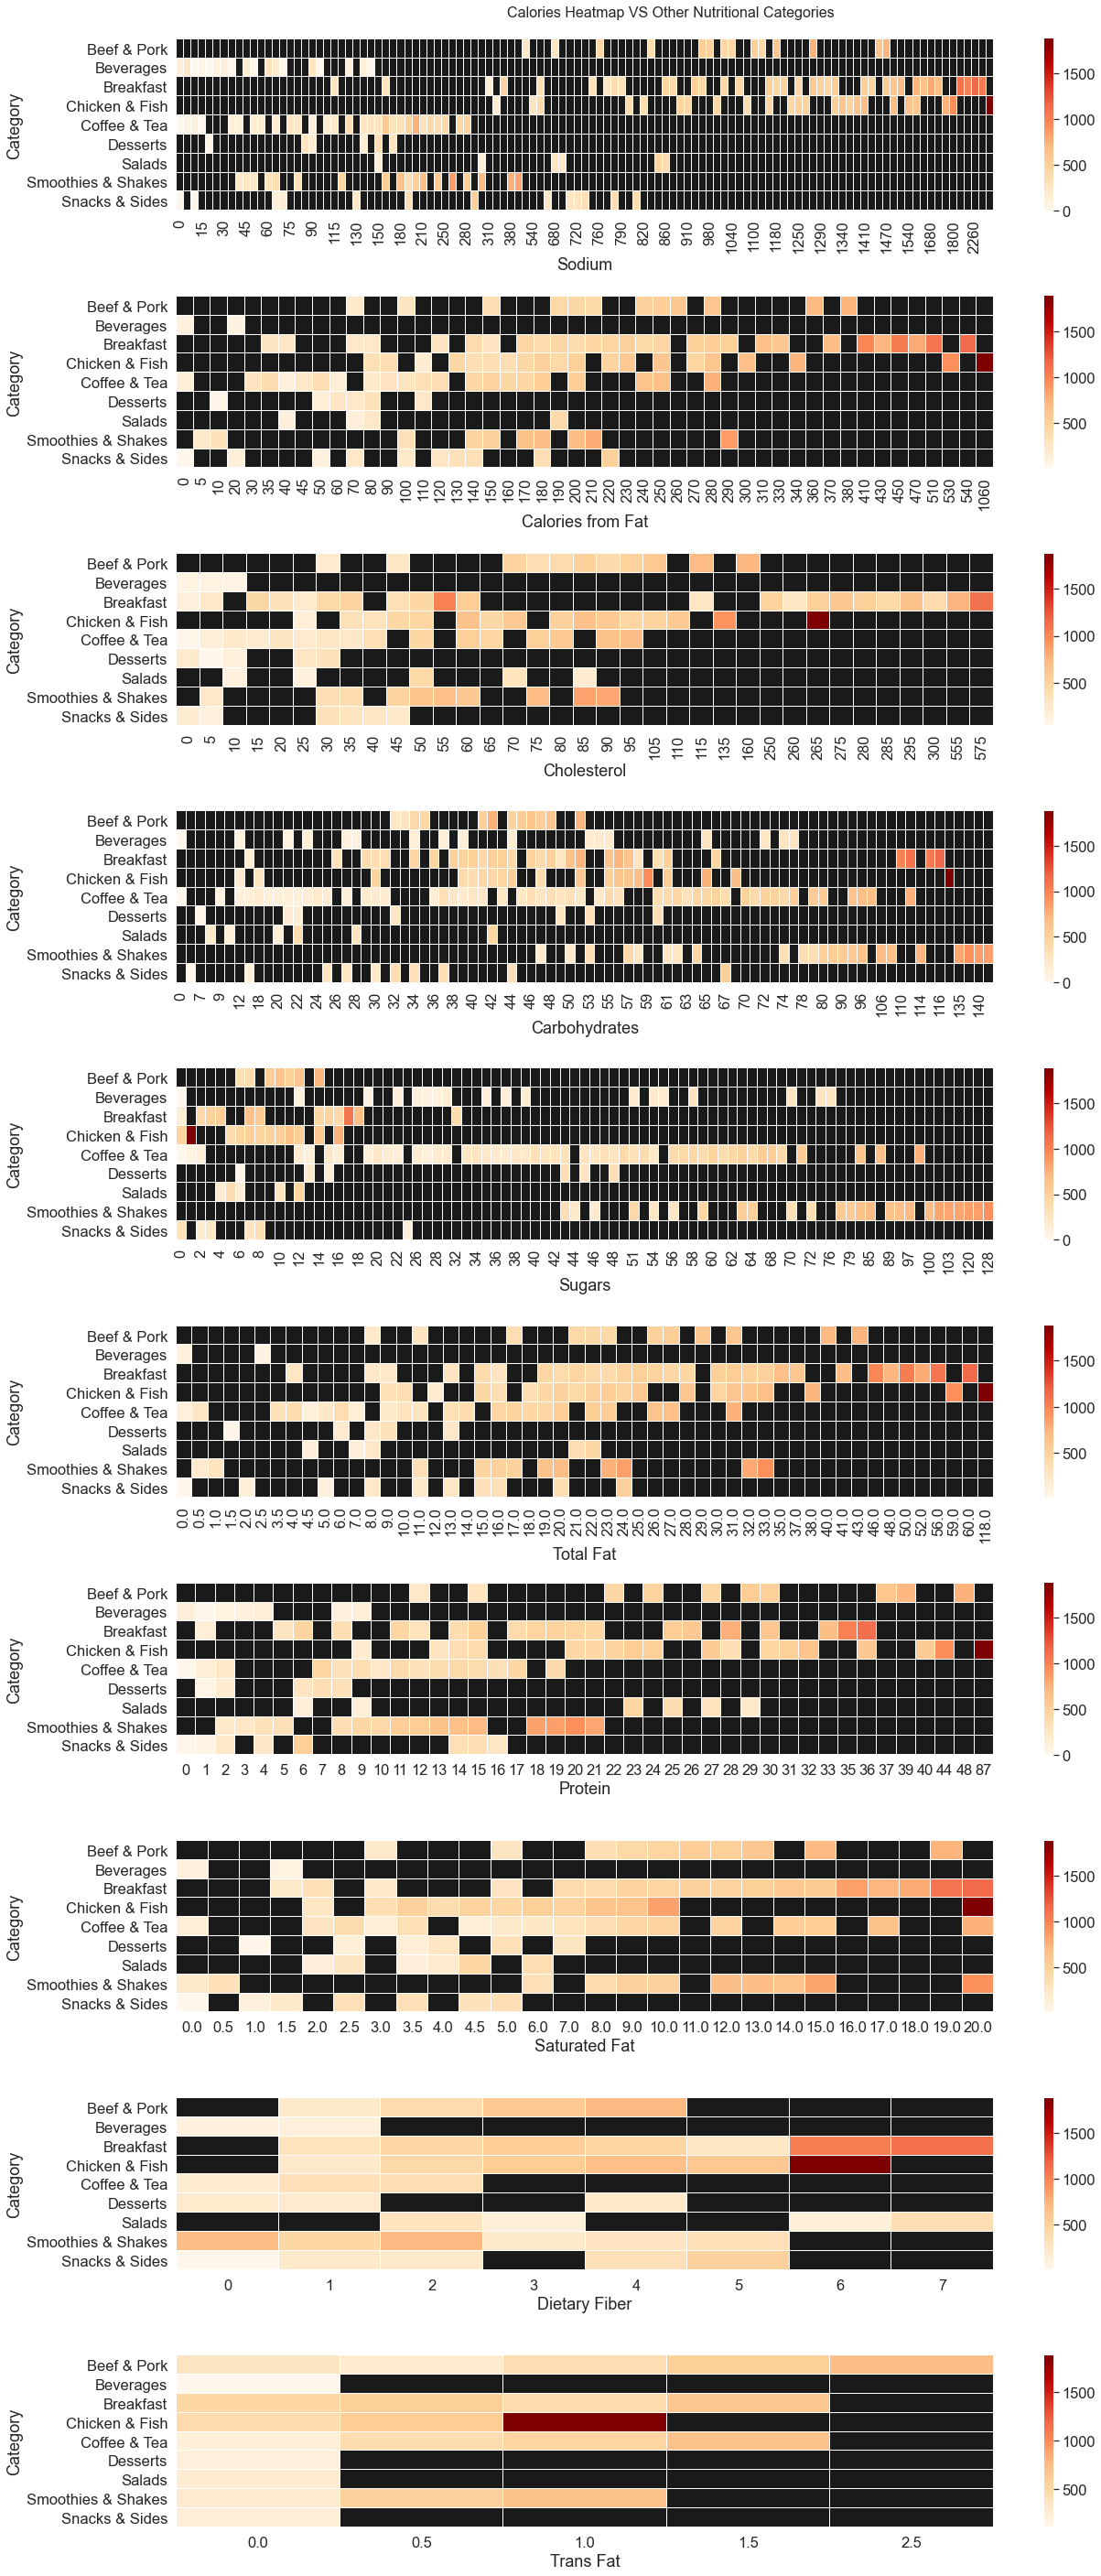

In [16]:
fig, axs = plt.subplots(len(variables_total_2), 1, figsize=(20, 50))
axs = axs.flatten()

for j, v2 in enumerate(variables_total_2):
    df4=df[['Category', 'Calories', v2]]
    df4=df4.pivot_table(index='Category', columns=v2, values='Calories')
    g=sns.heatmap(df4, ax=axs[j], linewidths=0.005, cmap = 'OrRd')
    g.set_facecolor('k')
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)
fig.suptitle('Calories Heatmap VS Other Nutritional Categories', y=0.89, fontsize = 16)

